Université Paul Sabatier

EIMAB3H1 - Analyse et exploitation de données

Enseignant : **José G. Moreno**

In [ ]:
# On indique ici que l'on utilise PyDrive et on importe les modules nécessaires
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authentification et création du client PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [1]:
from os import listdir
from os.path import isfile, join

# TP 3. Résumé automatique

Les résumés automatiques sont devenus un moyen commun pour explorer de grandes collections de documents.

Les défis de la génération automatique de résumés résident dans l'extraction de points importants du document. Par exemple, un bon système de résumé automatique du printemps arabe devrai capturer des événements comme "le président de l'Egypte, Hosni Moubarak, a démissionné le 11 février 2011. ", "Mouammar Kadhafi a été tué le 20 octobre 2011.", etc.

Dans ce TP nous utiliserons une collection de critiques d’utilisateurs sur 5 produits afin de construire un résumé automatique pour chaque produit de type extractif comme vu dans le cours.

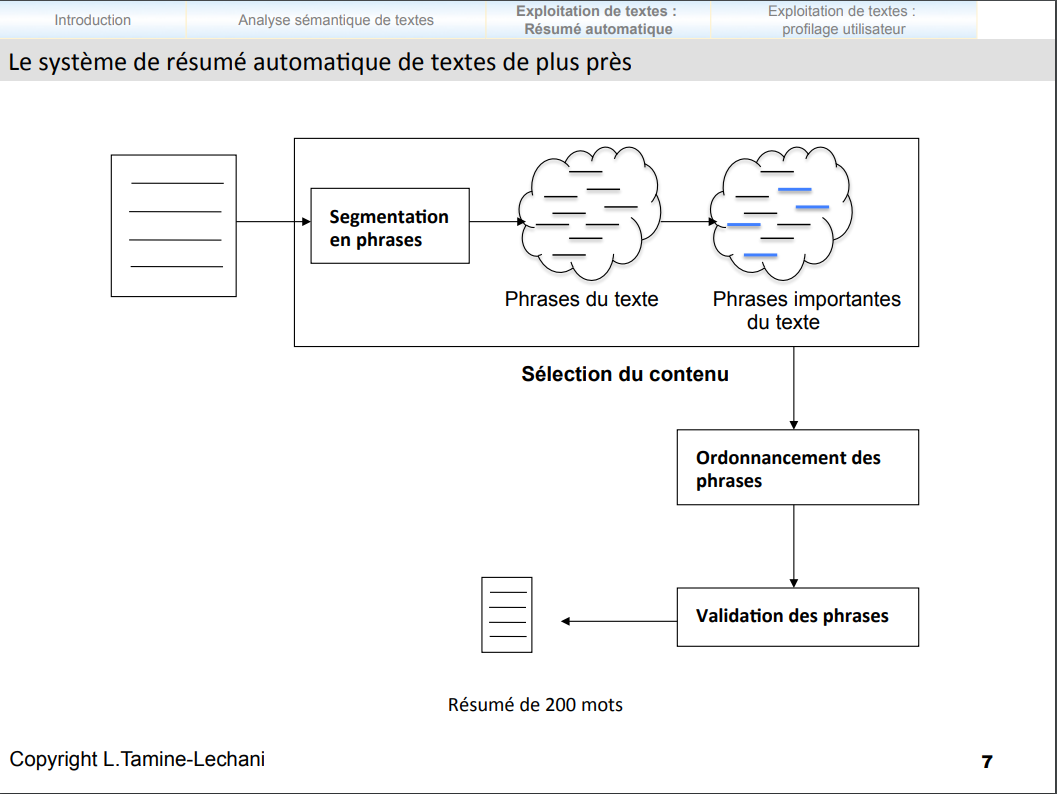

## 1. Collection

Téléchargez le fichier Critiques.zip et décompressez-le (le commandes sont ci- dessous). Ce fichier contient sur le dossier « projects/test-summarization » trois dossiers : « reference », « system » et « topics ». Dans « topics » vous trouverez 5 fichiers et chaque fichier contient plusieurs phrases (1 par ligne), ces seront notres documents à résumer (ou les documents d’entrée). Dans « reference » vous trouverez 5 fichiers avec le résumé de chaque topique fait manuellement par un humain. Finalement, dans « system » vous devez créer 5 fichiers avec le résumé de votre système. Un résumé naïf est déjà dans le dossier « system », il consiste à utiliser les 5 premières lignes de chaque document d’entré (dossier « topics »). Notez que vous pouvez facilement améliorer ces résultats.

In [4]:
!rm -rf Critiques*
!gdown --id 1_fdHg9UgtVPEBvBqFKE4tavn05HMeK3X
!unzip -qq Critiques.zip
!echo "*****"
!ls Critiques/projects/test-summarization/

/bin/sh: 1: gdown: not found
/bin/sh: 1: unzip: not found
*****
ls: cannot access 'Critiques/projects/test-summarization/': No such file or directory


In [5]:
from zipfile import ZipFile 
  
# spécifiant le nom du fichier zip
file = "Critiques.zip"
  
# ouvrir le fichier zip en mode lecture
with ZipFile(file, 'r') as zip: 
    # afficher tout le contenu du fichier zip
    zip.printdir() 
  
    # extraire tous les fichiers
    print('extraction...') 
    zip.extractall() 
    print('Terminé!')

FileNotFoundError: [Errno 2] No such file or directory: 'Critiques.zip'

In [ ]:
# !head projects/test-summarization/topics/*
# !head projects/test-summarization/reference/*
# !head projects/test-summarization/system/*

## 2. Évaluation

Utilisez le fichier jar pour évaluer le système naïf, pour le faire utilisez la commande (sur une console) :

```
!java -jar rouge2-1.2.1.jar     
```
Vous aurez comme sortie :
```
========Results Summary=======

ROUGE-L+StopWordRemoval	PRICE	AMAZON	Average_R:0.50000	Average_P:0.11538	Average_F:0.18750	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	PRICE	AMAZON	Average_R:0.46154	Average_P:0.09836	Average_F:0.16216	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	PRICE	AMAZON	Average_R:0.09091	Average_P:0.01786	Average_F:0.02985	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	PRICE	AMAZON	Average_R:0.22222	Average_P:0.03922	Average_F:0.06667	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	SOUND	IPOD	Average_R:0.28571	Average_P:0.05128	Average_F:0.08696	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	SOUND	IPOD	Average_R:0.28571	Average_P:0.04167	Average_F:0.07273	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	SOUND	IPOD	Average_R:0.20000	Average_P:0.02326	Average_F:0.04167	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	SOUND	IPOD	Average_R:0.18750	Average_P:0.01579	Average_F:0.02913	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.25000	Average_P:0.09091	Average_F:0.13333	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.33333	Average_P:0.05660	Average_F:0.09677	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.00000	Average_P:0.00000	Average_F:0.00000	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.16000	Average_P:0.01860	Average_F:0.03333	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.37500	Average_P:0.06383	Average_F:0.10909	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.37500	Average_P:0.04918	Average_F:0.08696	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.00000	Average_P:0.00000	Average_F:0.00000	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.13043	Average_P:0.01176	Average_F:0.02158	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.20000	Average_P:0.08333	Average_F:0.11765	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.18750	Average_P:0.06122	Average_F:0.09231	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.07692	Average_P:0.02273	Average_F:0.03509	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.08000	Average_P:0.02041	Average_F:0.03252	Num Reference Summaries:1


======Results Summary End======
```



In [ ]:
!java -jar rouge2-1.2.1.jar  


SyntaxError: ignored

In [ ]:
pip install import-java

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
  Created wheel for import-java: filename=import_java-0.6-py3-none-any.whl size=3889 sha256=458db5148ae8d6257ac6b650252745d6bff2b04dc38a835a45eefe44683d00f2
  Stored in directory: /root/.cache/pip/wheels/51/09/31/9fb6dace71849be59248ac66be97898d3e21b97a1efc013495
Successfully built import-java


In [ ]:
import java


Notez que les valeurs de ROUGE-L, ROUGE-1, ROUGE-2 et ROUGE-SU4 sont affichées en termes de Rappel, Précision et F-mesure. Les résultats sont calculés pour les 5 topiques que nous avons : « battery life netbook », « price amazon kindle », « room holiday inn london », « sound ipod nano 8g » et « speed windows 7 ».

Pour voir que les résultats de la f-measure **ROUGE-L** de chaque topique utilisez 

In [ ]:
!java -jar rouge2-1.2.1.jar  | grep "ROUGE-L"  ## Rappel

Error: Unable to access jarfile rouge2-1.2.1.jar


In [ ]:
!java -jar rouge2-1.2.1.jar    | grep "ROUGE-1" | awk '{split($6,a,":"); print a[2];}' ## Precision

0.16216
0.07273
0.09677
0.08696
0.09231


In [ ]:
!java -jar rouge2-1.2.1.jar    | grep "ROUGE-2" | awk '{split($6,a,":"); print a[2];}' ## F-mesure

0.02985
0.04167
0.00000
0.00000
0.03509


## 3. Documents

Inspectez les documents sur le dossier « topics ». Calculez de statistiques basiques de chaque fichier, comme par exemple le nombre de lignes, de mots, mots plus fréquents, etc.

In [ ]:
!head projects/test-summarization/topics/*

head: cannot open 'projects/test-summarization/topics/*' for reading: No such file or directory


In [ ]:

montableau = [x.strip() for x in open('projects/test-summarization/topics/sound_ipod_nano_8gb.txt.data', encoding='windows-1252')]
montableau[:5]

FileNotFoundError: ignored

In [ ]:
import glob

path_to_target ='projects/test-summarization/topics'

path_to_file_list = glob.glob(path_to_target + '*hdf' )
print(path_to_file_list)
for path_to_file in path_to_file_list:
    print(path_to_file)

[]


In [ ]:
import re
import os

In [ ]:

# Choix du répertoire qui va contenir les fichiers téléchargés
dossier = os.path.expanduser('/content/Critiques/projects/test-summarization/topics')
try:
  os.makedirs(dossier)
except: pass


In [ ]:
import glob
files=glob.glob('/content/Critiques/projects/test-summarization/topics')

In [ ]:
from os import listdir

## Prints the current directory as a list (including file types)
print(os.listdir('/content/Critiques/projects/test-summarization/topics'))

['price_amazon_kindle.txt.data', 'speed_windows7.txt.data', 'battery-life_netbook_1005ha.txt.data', 'sound_ipod_nano_8gb.txt.data', 'room_holiday_inn_london.txt.data']


In [ ]:
files_name=[]
for fichier in files:
  nom =fichier['title']
  print(nom)

TypeError: ignored

In [ ]:

# Parcours du dossier Google Drive et téléchargement des fichiers
liste_fichiers = Critiques.ListFile().GetList()
files_name=[]
for fichier in liste_fichiers:
  nom =fichier['title']
  print(nom)

# print('Téléchargement de {}'.format(nom))
# # nouveauFichier = drive.CreateFile({'id': fichier['id']})
# # nouveauFichier.GetContentFile(nom)



NameError: ignored

In [ ]:
re.findall('/root/projects/test-summarization/topics/',files_name) for f in files_name

TypeError: ignored

In [ ]:
# for fichier in liste_fichiers:
#   print(fichier)


SyntaxError: ignored

In [ ]:
fichier['title']

'serie-exercices-rl.pdf'

In [ ]:
print(dossier)

/root/projects/test-summarization/topics


In [ ]:
import os
for path, subdirs, files in os.walk('folder'):
     for name in files:
             print(os.path.join(path, name))

In [ ]:
os.walk('content')

<generator object walk at 0x7f4f50db3650>

In [ ]:
from os import walk
listeFichiers = []
for (repertoire, sousRepertoires, fichiers) in open(monRepertoire):
  print(repertoire)
  listeFichiers.extend(fichiers)

FileNotFoundError: ignored

In [ ]:
listeFichiers

[]

In [ ]:
monRepertoire='projects/test-summarization/topics'
fichiers = [f for f in listdir(monRepertoire) if isfile(join(monRepertoire, f))]


FileNotFoundError: ignored

## 4. Tableau
 Pour chaque document dans le dossier topiques et à l’aide de python, stockez toutes le lignes dans un tableau de tel façon que chaque ligne corresponde à une dimension du tableau.

In [ ]:
# complétez le code
montableau = [x.strip() for x in open('projects/test-summarization/topics/sound_ipod_nano_8gb.txt.data', encoding='windows-1252')]
montableau[:5]

['headphone jack i got a clear case for it and it  i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .',
 'Picture and sound quality are excellent for this typ of devic .',
 'Great sound, easy to load & use once I read the instructions .',
 'The music I loaded sounds clear and crisp .',
 'As for the overall sound I would give it a 8 out of 10, and the volume offers itself loud enough to tune out everything else at your local gym .']

## 5. Résumé

Calculez un résumé automatique en utilisant l’algorithme du cours (diapo 11). Alternativement, vous pouvez calculer la similarité de chaque ligne avec toutes les autres lignes du même tableau. Pour ça, vous pouvez utiliser ***wordnet***, ***ppmi***, la formule donné en cours basés sur le ***tf-idf*** ou les ***word embeddings***. 

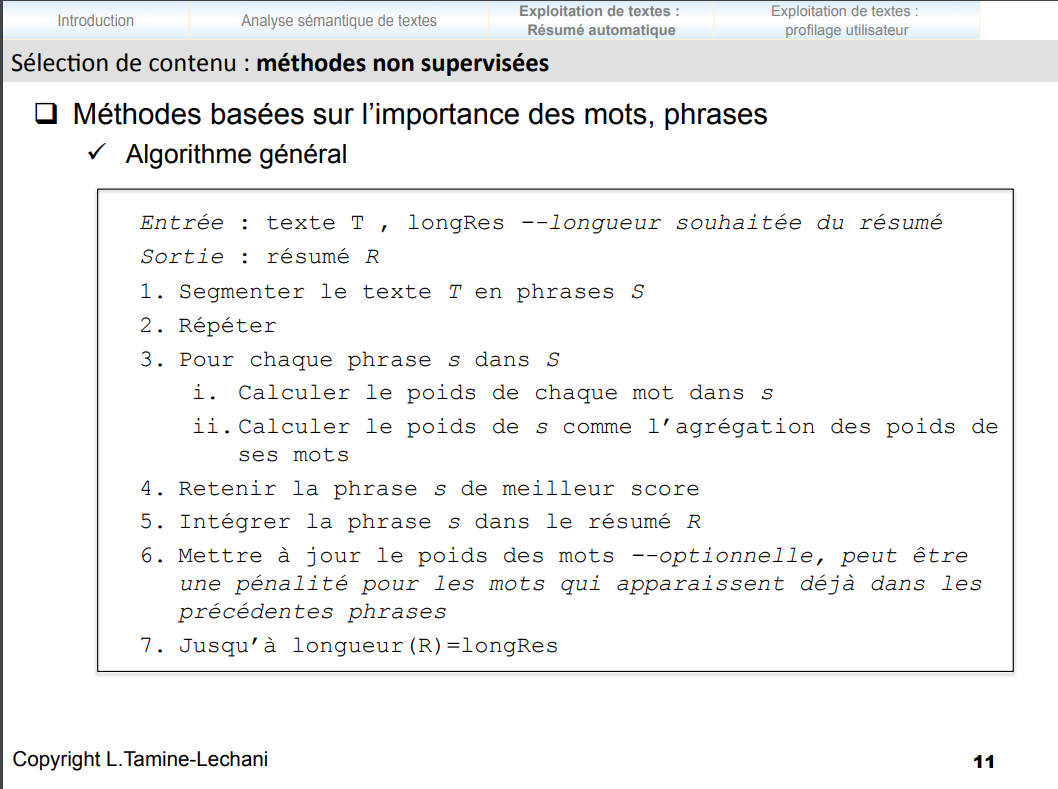

## 6. Sauvegarde

Sauvegardez votre résumé de chaque document d’entrée dans le dossier « system » en écrasant les fichiers existants.

## 7. Évaluation 2
Calculez à nouveau les valeurs de ROUGE en utilisant le fichier jar comme dans le point 2. Avez-vous une amélioration par rapport au système naïf ? Si non, vérifiez les étapes 4 et 5 jusqu’à trouver un une amélioration dans les résultats.

## 8. Alternatives 

Utilisez une autre méthode (ou d’autres paramètres de votre système) pour améliorer encore vos résultats.